In [8]:
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch import optim
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

In [3]:
class BaseClassifier(nn.Module):
    def __init__(self, in_dim, feature_dim, out_dim):
        super(BaseClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(in_dim, feature_dim, bias=True),
            nn.ReLU(),
            nn.Linear(feature_dim, out_dim, bias=True)
        )

    def forward(self, x):
        return self.classifier(x)

In [4]:
# Load MNIST from pytorch

train_dataset = MNIST("../data/mnist", train=True, transform=ToTensor(), download=True)
test_dataset = MNIST("../data/mnist", train=False, transform=ToTensor(), download=True)

4.0%

100.0%


Extracting ../data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../data/mnist/MNIST/raw


100.0%


Extracting ../data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/mnist/MNIST/raw




39.7%

100.0%
100.0%


Extracting ../data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/mnist/MNIST/raw

Extracting ../data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/mnist/MNIST/raw



In [5]:
# load data from pytorch

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [6]:
train_loader.dataset.data.shape, test_loader.dataset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [18]:
# instantiate model, optimizer, hyperparameters

in_dim, feature_dim, out_dim = 784, 256, 10
lr = 1e-3
loss_fn = nn.CrossEntropyLoss()
epoch = 10
classifier = BaseClassifier(in_dim, feature_dim, out_dim)
optimizer = optim.SGD(classifier.parameters(), lr=lr)

In [19]:
def train(classifier = classifier,
          optimizer = optimizer,
          loss_fn = loss_fn,
          epochs = epoch):
    
    classifier.train()
    loss_train = []
    for epoch in range(epochs):
        running_loss = 0.0
        for minibatch in train_loader:
            data, target = minibatch
            data = data.flatten(start_dim=1)
            out = classifier(data)
            loss = loss_fn(out, target)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # keep track of sum of loss of each minibatch
            running_loss += loss.item()
        loss_train.append(running_loss/len(train_loader))
        print(f'Epochs: {epoch+1}, Train Loss: {running_loss/len(train_loader)}')
    
    plt.plot([i for i in range(1, epochs+1)], loss_train)
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.title(f'MNIST Training Loss : Optimizer Adam, lr = {lr}')
    plt.show()

    # save state to file at checkpoint
    dir = '../model/'
    if not os.path.exists(dir):
        os.makedirs(dir)
    torch.save(classifier.state_dict(), dir + 'mnist_classifier.pth')

In [20]:
def test(classifier = classifier,
         loss_fn = loss_fn):
    classifier.eval()
    accuracy = 0
    compute_loss = 0

    with torch.no_grad():
        for data, target in test_loader:
               data = data.flatten(start_dim=1)
               out = classifier(data)
               _, pred = out.max(dim=1)

               # get loss and accuracy
               compute_loss += loss_fn(out, target)
               accuracy += torch.sum(pred == target)

    print(f'Test Loss: {compute_loss.item()/(len(test_loader))*64}')
    print(f'Test Accuracy: {accuracy.item()/(len(test_loader.dataset)*64)}')

Epochs: 1, Train Loss: 2.2188364574904127
Epochs: 2, Train Loss: 1.9959639722604487
Epochs: 3, Train Loss: 1.7038635944506761
Epochs: 4, Train Loss: 1.3937541665807207
Epochs: 5, Train Loss: 1.1376182147816045
Epochs: 6, Train Loss: 0.9551558759548008
Epochs: 7, Train Loss: 0.8290205690652322
Epochs: 8, Train Loss: 0.7397335842728361
Epochs: 9, Train Loss: 0.6742010968072074
Epochs: 10, Train Loss: 0.6243819457445063


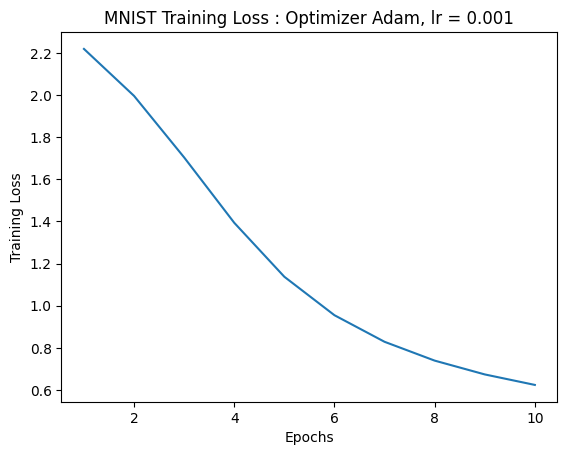

In [21]:
train()

In [22]:
test()

Test Loss: 37.16878047870223
Test Accuracy: 0.0135140625
